In [ ]:
!apt-get install unrar



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


True
Tesla T4


In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
checkpoint_dir = '/content/drive/MyDrive/ct_scan'
os.makedirs(checkpoint_dir, exist_ok=True)


Mounted at /content/drive


In [ ]:
import os

uploaded_files = ["/content/drive/MyDrive/ct_scan/AAH.rar", "/content/drive/MyDrive/ct_scan/AIS.rar", "/content/drive/MyDrive/ct_scan/MIA.rar"]
extracted_folder = "/content/CT_dataset"
os.makedirs(extracted_folder, exist_ok=True)

for rar_path in uploaded_files:
    !unrar x "{rar_path}" "{extracted_folder}/"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/ct_scan/AAH.rar

Creating    /content/CT_dataset/AAH                                   OK
Extracting  /content/CT_dataset/AAH/sample206_AAH.npy                      4%  OK 
Extracting  /content/CT_dataset/AAH/sample242_AAH.npy                      8%  OK 
Extracting  /content/CT_dataset/AAH/sample272_AAH.npy                     13%  OK 
Extracting  /content/CT_dataset/AAH/sample322_AAH.npy                     18%  OK 
Extracting  /content/CT_dataset/AAH/sample323_AAH.npy                     23%  OK 
Extracting  /content/CT_dataset/AAH/sample324_AAH.npy                     28%  OK 
Extracting  /content/CT_dataset/AAH/sample379_AAH.npy                     33%  OK 
Extracting  /content/CT_dataset/AAH/sample463_AAH.npy                     38%  OK 
Extracting  /content/CT_dataset/AAH/sample465_AAH.npy      

In [ ]:

for root, dirs, files in os.walk(extracted_folder):
    for f in files:
        print(os.path.join(root, f))


/content/CT_dataset/AIS/sample393_AIS.npy
/content/CT_dataset/AIS/sample941_AIS.npy
/content/CT_dataset/AIS/sample1024_AIS.npy
/content/CT_dataset/AIS/sample895_AIS.npy
/content/CT_dataset/AIS/sample412_AIS.npy
/content/CT_dataset/AIS/sample968_AIS.npy
/content/CT_dataset/AIS/sample542_AIS.npy
/content/CT_dataset/AIS/sample427_AIS.npy
/content/CT_dataset/AIS/sample553_AIS.npy
/content/CT_dataset/AIS/sample742_AIS.npy
/content/CT_dataset/AIS/sample1045_AIS.npy
/content/CT_dataset/AIS/sample782_AIS.npy
/content/CT_dataset/AIS/sample731_AIS.npy
/content/CT_dataset/AIS/sample554_AIS.npy
/content/CT_dataset/AIS/sample914_AIS.npy
/content/CT_dataset/AIS/sample56_AIS.npy
/content/CT_dataset/AIS/sample335_AIS.npy
/content/CT_dataset/AIS/sample505_AIS.npy
/content/CT_dataset/AIS/sample759_AIS.npy
/content/CT_dataset/AIS/sample352_AIS.npy
/content/CT_dataset/AIS/sample78_AIS.npy
/content/CT_dataset/AIS/sample1027_AIS.npy
/content/CT_dataset/AIS/sample981_AIS.npy
/content/CT_dataset/AIS/sample732

In [ ]:
import numpy as np

sample_file = "/content/CT_dataset/AIS/sample1029_AIS.npy"
volume = np.load(sample_file)

print("Volume shape:", volume.shape)
print("Min value:", volume.min(), "Max value:", volume.max())


Volume shape: (128, 128, 128)
Min value: -1042 Max value: 1304


In [ ]:
import os
import numpy as np

extracted_folder = "/content/CT_dataset"

for root, dirs, files in os.walk(extracted_folder):
    for f in files:
        if f.endswith(".npy"):
            path = os.path.join(root, f)
            volume = np.load(path)
            print(f"{f} shape:", volume.shape)


sample393_AIS.npy shape: (128, 128, 128)
sample941_AIS.npy shape: (128, 128, 128)
sample1024_AIS.npy shape: (128, 128, 128)
sample895_AIS.npy shape: (128, 128, 128)
sample412_AIS.npy shape: (128, 128, 128)
sample968_AIS.npy shape: (128, 128, 128)
sample542_AIS.npy shape: (128, 128, 128)
sample427_AIS.npy shape: (128, 128, 128)
sample553_AIS.npy shape: (128, 128, 128)
sample742_AIS.npy shape: (128, 128, 128)
sample1045_AIS.npy shape: (128, 128, 128)
sample782_AIS.npy shape: (128, 128, 128)
sample731_AIS.npy shape: (128, 128, 128)
sample554_AIS.npy shape: (128, 128, 128)
sample914_AIS.npy shape: (128, 128, 128)
sample56_AIS.npy shape: (128, 128, 128)
sample335_AIS.npy shape: (128, 128, 128)
sample505_AIS.npy shape: (128, 128, 128)
sample759_AIS.npy shape: (128, 128, 128)
sample352_AIS.npy shape: (128, 128, 128)
sample78_AIS.npy shape: (128, 128, 128)
sample1027_AIS.npy shape: (128, 128, 128)
sample981_AIS.npy shape: (128, 128, 128)
sample732_AIS.npy shape: (128, 128, 128)
sample152_AIS.n

In [ ]:
import os, random, csv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


Hmin, Hmax = -1000, 400
patch_size = (32, 32, 32)
Alpha = 0.5
nvpr = 3
noise = 0.02
O_F = "/content/output_tampered"
os.makedirs(O_F, exist_ok=True)
os.makedirs(os.path.join(O_F, "visuals"), exist_ok=True)

def load_volume(path):
    return np.load(path)

def hu_window_and_normalize(volume, hu_min, hu_max):
    volume = np.clip(volume, hu_min, hu_max)
    return ((volume - hu_min) / (hu_max - hu_min)).astype(np.float32)

def apply_intensity_mod(patch, in_hu=False):
    factor = np.random.uniform(0.9, 1.1)
    return np.clip(patch * factor, 0.0, 1.0)

def make_spherical_alpha(patch_size, sigma_frac=0.5):
    z, y, x = np.indices(patch_size)
    cz, cy, cx = [s // 2 for s in patch_size]
    r2 = (z - cz) ** 2 + (y - cy) ** 2 + (x - cx) ** 2
    r2 = r2 / r2.max()
    alpha = np.exp(-r2 / (2 * sigma_frac ** 2))
    return alpha.astype(np.float32)

def random_location_for_patch(shape, patch_size):
    return [random.randint(0, max(0, s - ps)) for s, ps in zip(shape, patch_size)]

npy_folder = "/content/CT_dataset/AIS"
npy_files = sorted([os.path.join(npy_folder, f) for f in os.listdir(npy_folder) if f.endswith(".npy")])
alpha_patch = make_spherical_alpha(patch_size, sigma_frac=Alpha)

metadata_rows = []
variant_counter = 0
save_visual_prob = 0.01

print(f"Found {len(npy_files)} .npy volumes")


for i, target_path in enumerate(npy_files):
    target_vol = hu_window_and_normalize(load_volume(target_path), Hmin, Hmax)
    target_name = Path(target_path).stem
    tz, th, tw = target_vol.shape
    pz, ph, pw = patch_size

    if tz < pz or th < ph or tw < pw:
        print(f"Skipping {target_name}: volume smaller than patch size.")
        continue

    for v_idx in range(nvpr):
        donor_idx = random.choice([j for j in range(len(npy_files)) if j != i])
        donor_vol = hu_window_and_normalize(load_volume(npy_files[donor_idx]), Hmin, Hmax)
        donor_name = Path(npy_files[donor_idx]).stem

        dz0, dy0, dx0 = [random.randint(0, max(0, s - ps)) for s, ps in zip(donor_vol.shape, patch_size)]
        donor_patch = donor_vol[dz0:dz0+pz, dy0:dy0+ph, dx0:dx0+pw]
        donor_patch = apply_intensity_mod(donor_patch, in_hu=False)

        tz0, ty0, tx0 = random_location_for_patch(target_vol.shape, patch_size)

        target_patch = target_vol[tz0:tz0+pz, ty0:ty0+ph, tx0:tx0+pw]
        alpha = alpha_patch
        blended_patch = (1 - alpha) * target_patch + alpha * donor_patch
        blended_patch += np.random.normal(0, noise, blended_patch.shape).astype(np.float32)
        blended_patch = np.clip(blended_patch, 0.0, 1.0)

        tampered = target_vol.copy()
        tampered[tz0:tz0+pz, ty0:ty0+ph, tx0:tx0+pw] = blended_patch
        tamper_mask = np.zeros_like(target_vol, dtype=np.uint8)
        tamper_mask[tz0:tz0+pz, ty0:ty0+ph, tx0:tx0+pw] = (alpha > 0.05).astype(np.uint8)

        out_base = f"{target_name}_variant{v_idx}"
        np.save(os.path.join(O_F, out_base + "_tampered.npy"), tampered.astype(np.float32))
        np.save(os.path.join(O_F, out_base + "_tamper_mask.npy"), tamper_mask.astype(np.uint8))
        if random.random() < save_visual_prob:
            cz = tz0 + pz // 2
            fig, axs = plt.subplots(1, 3, figsize=(12, 4))
            axs[0].imshow(target_vol[cz], cmap='gray'); axs[0].set_title("Original")
            axs[1].imshow(tampered[cz], cmap='gray'); axs[1].set_title("Tampered")
            axs[2].imshow(tamper_mask[cz], cmap='gray'); axs[2].set_title("Mask")
            for ax in axs: ax.axis('off')
            plt.tight_layout()
            fig_path = os.path.join(O_F, "visuals", out_base + "_viz.png")
            plt.savefig(fig_path, dpi=150)
            plt.close(fig)

        metadata_rows.append({
            "target": target_name,
            "donor": donor_name,
            "variant": v_idx,
            "out_volume": out_base + "_tampered.npy",
            "out_mask": out_base + "_tamper_mask.npy",
            "tz0": tz0, "ty0": ty0, "tx0": tx0,
            "patch_size_d": pz, "patch_size_h": ph, "patch_size_w": pw
        })

        variant_counter += 1

print(f"Generated {variant_counter} tampered variants. Saved to {O_F}")

meta_csv = os.path.join(O_F, "tamper_metadata.csv")
with open(meta_csv, "w", newline="") as csvfile:
    fieldnames = list(metadata_rows[0].keys()) if metadata_rows else ["info"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for r in metadata_rows:
        writer.writerow(r)

print("Metadata saved to", meta_csv)


Found 444 .npy volumes
Generated 1332 tampered variants. Saved to /content/output_tampered
Metadata saved to /content/output_tampered/tamper_metadata.csv


Tampered volume shape: (128, 128, 128)
Mask volume shape: (128, 128, 128)


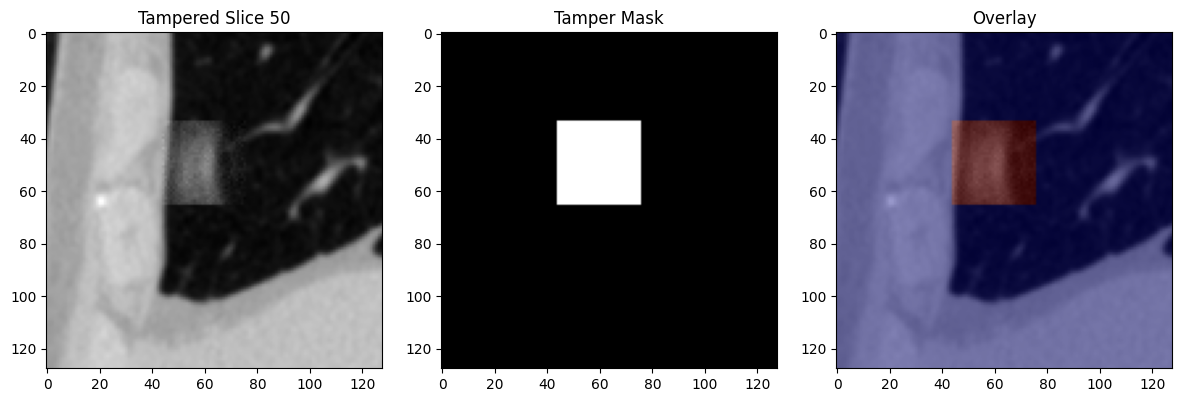

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os


tamper_dir = "/content/output_tampered"

tampered_files = [f for f in os.listdir(tamper_dir) if f.endswith("_tampered.npy")]
sample_file = random.choice(tampered_files)

tampered_path = os.path.join(tamper_dir, sample_file)
mask_path = tampered_path.replace("_tampered.npy", "_tamper_mask.npy")

tampered_vol = np.load(tampered_path)
mask_vol = np.load(mask_path)

print("Tampered volume shape:", tampered_vol.shape)
print("Mask volume shape:", mask_vol.shape)

tamper_indices = np.where(mask_vol > 0)
slice_idx = tamper_indices[2][0] if len(tamper_indices[2]) > 0 else tampered_vol.shape[2] // 2

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(tampered_vol[:, :, slice_idx], cmap="gray")
plt.title(f"Tampered Slice {slice_idx}")

plt.subplot(1, 3, 2)
plt.imshow(mask_vol[:, :, slice_idx], cmap="gray")
plt.title("Tamper Mask")

plt.subplot(1, 3, 3)
plt.imshow(tampered_vol[:, :, slice_idx], cmap="gray")
plt.imshow(mask_vol[:, :, slice_idx], cmap="jet", alpha=0.4)
plt.title("Overlay")

plt.tight_layout()
plt.show()


In [ ]:
import os, random, csv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


Hmin, Hmax = -1000, 400
patch_size = (32, 32, 32)
Alpha = 0.5
nvpr = 3
noise = 0.02
O_F = "/content/output_tampered_AAH"
os.makedirs(O_F, exist_ok=True)
os.makedirs(os.path.join(O_F, "visuals"), exist_ok=True)


def load_volume(path):
    return np.load(path)

def hu_window_and_normalize(volume, hu_min, hu_max):
    volume = np.clip(volume, hu_min, hu_max)
    return ((volume - hu_min) / (hu_max - hu_min)).astype(np.float32)

def apply_intensity_mod(patch, in_hu=False):
    factor = np.random.uniform(0.9, 1.1)
    return np.clip(patch * factor, 0.0, 1.0)

def make_spherical_alpha(patch_size, sigma_frac=0.5):
    z, y, x = np.indices(patch_size)
    cz, cy, cx = [s // 2 for s in patch_size]
    r2 = (z - cz) ** 2 + (y - cy) ** 2 + (x - cx) ** 2
    r2 = r2 / r2.max()
    alpha = np.exp(-r2 / (2 * sigma_frac ** 2))
    return alpha.astype(np.float32)

def random_location_for_patch(shape, patch_size):
    return [random.randint(0, max(0, s - ps)) for s, ps in zip(shape, patch_size)]


npy_folder = "/content/CT_dataset/AAH"
npy_files = sorted([os.path.join(npy_folder, f) for f in os.listdir(npy_folder) if f.endswith(".npy")])
alpha_patch = make_spherical_alpha(patch_size, sigma_frac=Alpha)

metadata_rows = []
variant_counter = 0
save_visual_prob = 0.01

print(f"Found {len(npy_files)} .npy volumes")


for i, target_path in enumerate(npy_files):
    target_vol = hu_window_and_normalize(load_volume(target_path), Hmin, Hmax)
    target_name = Path(target_path).stem
    tz, th, tw = target_vol.shape
    pz, ph, pw = patch_size

    if tz < pz or th < ph or tw < pw:
        print(f"Skipping {target_name}: volume smaller than patch size.")
        continue

    for v_idx in range(nvpr):

        donor_idx = random.choice([j for j in range(len(npy_files)) if j != i])
        donor_vol = hu_window_and_normalize(load_volume(npy_files[donor_idx]), Hmin, Hmax)
        donor_name = Path(npy_files[donor_idx]).stem

        dz0, dy0, dx0 = [random.randint(0, max(0, s - ps)) for s, ps in zip(donor_vol.shape, patch_size)]
        donor_patch = donor_vol[dz0:dz0+pz, dy0:dy0+ph, dx0:dx0+pw]
        donor_patch = apply_intensity_mod(donor_patch, in_hu=False)

        tz0, ty0, tx0 = random_location_for_patch(target_vol.shape, patch_size)

        target_patch = target_vol[tz0:tz0+pz, ty0:ty0+ph, tx0:tx0+pw]
        alpha = alpha_patch
        blended_patch = (1 - alpha) * target_patch + alpha * donor_patch
        blended_patch += np.random.normal(0, noise, blended_patch.shape).astype(np.float32)
        blended_patch = np.clip(blended_patch, 0.0, 1.0)

        tampered = target_vol.copy()
        tampered[tz0:tz0+pz, ty0:ty0+ph, tx0:tx0+pw] = blended_patch
        tamper_mask = np.zeros_like(target_vol, dtype=np.uint8)
        tamper_mask[tz0:tz0+pz, ty0:ty0+ph, tx0:tx0+pw] = (alpha > 0.05).astype(np.uint8)

        out_base = f"{target_name}_variant{v_idx}"
        np.save(os.path.join(O_F, out_base + "_tampered.npy"), tampered.astype(np.float32))
        np.save(os.path.join(O_F, out_base + "_tamper_mask.npy"), tamper_mask.astype(np.uint8))


        if random.random() < save_visual_prob:
            cz = tz0 + pz // 2
            fig, axs = plt.subplots(1, 3, figsize=(12, 4))
            axs[0].imshow(target_vol[cz], cmap='gray'); axs[0].set_title("Original")
            axs[1].imshow(tampered[cz], cmap='gray'); axs[1].set_title("Tampered")
            axs[2].imshow(tamper_mask[cz], cmap='gray'); axs[2].set_title("Mask")
            for ax in axs: ax.axis('off')
            plt.tight_layout()
            fig_path = os.path.join(O_F, "visuals", out_base + "_viz.png")
            plt.savefig(fig_path, dpi=150)
            plt.close(fig)

        metadata_rows.append({
            "target": target_name,
            "donor": donor_name,
            "variant": v_idx,
            "out_volume": out_base + "_tampered.npy",
            "out_mask": out_base + "_tamper_mask.npy",
            "tz0": tz0, "ty0": ty0, "tx0": tx0,
            "patch_size_d": pz, "patch_size_h": ph, "patch_size_w": pw
        })

        variant_counter += 1

print(f"Generated {variant_counter} tampered variants. Saved to {O_F}")


meta_csv = os.path.join(O_F, "tamper_metadata.csv")
with open(meta_csv, "w", newline="") as csvfile:
    fieldnames = list(metadata_rows[0].keys()) if metadata_rows else ["info"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for r in metadata_rows:
        writer.writerow(r)

print("Metadata saved to", meta_csv)


Found 21 .npy volumes
Generated 63 tampered variants. Saved to /content/output_tampered_AAH
Metadata saved to /content/output_tampered_AAH/tamper_metadata.csv


Tampered volume shape: (128, 128, 128)
Mask volume shape: (128, 128, 128)


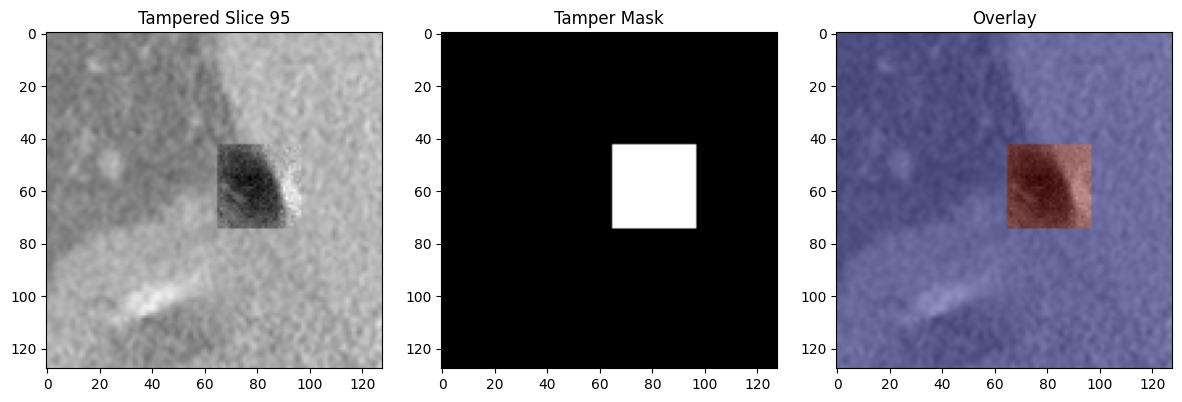

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os

tamper_dir = "/content/output_tampered_AAH"

tampered_files = [f for f in os.listdir(tamper_dir) if f.endswith("_tampered.npy")]
sample_file = random.choice(tampered_files)

tampered_path = os.path.join(tamper_dir, sample_file)
mask_path = tampered_path.replace("_tampered.npy", "_tamper_mask.npy")

tampered_vol = np.load(tampered_path)
mask_vol = np.load(mask_path)

print("Tampered volume shape:", tampered_vol.shape)
print("Mask volume shape:", mask_vol.shape)

tamper_indices = np.where(mask_vol > 0)
slice_idx = tamper_indices[2][0] if len(tamper_indices[2]) > 0 else tampered_vol.shape[2] // 2


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(tampered_vol[:, :, slice_idx], cmap="gray")
plt.title(f"Tampered Slice {slice_idx}")

plt.subplot(1, 3, 2)
plt.imshow(mask_vol[:, :, slice_idx], cmap="gray")
plt.title("Tamper Mask")

plt.subplot(1, 3, 3)
plt.imshow(tampered_vol[:, :, slice_idx], cmap="gray")
plt.imshow(mask_vol[:, :, slice_idx], cmap="jet", alpha=0.4)
plt.title("Overlay")

plt.tight_layout()
plt.show()


In [ ]:
import os, random, csv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


Hmin, Hmax = -1000, 400
patch_size = (32, 32, 32)
Alpha = 0.5
nvpr = 3
noise = 0.02
O_F = "/content/output_tampered_MIA"
os.makedirs(O_F, exist_ok=True)
os.makedirs(os.path.join(O_F, "visuals"), exist_ok=True)


def load_volume(path):
    return np.load(path)

def hu_window_and_normalize(volume, hu_min, hu_max):
    volume = np.clip(volume, hu_min, hu_max)
    return ((volume - hu_min) / (hu_max - hu_min)).astype(np.float32)

def apply_intensity_mod(patch, in_hu=False):
    factor = np.random.uniform(0.9, 1.1)
    return np.clip(patch * factor, 0.0, 1.0)

def make_spherical_alpha(patch_size, sigma_frac=0.5):
    z, y, x = np.indices(patch_size)
    cz, cy, cx = [s // 2 for s in patch_size]
    r2 = (z - cz) ** 2 + (y - cy) ** 2 + (x - cx) ** 2
    r2 = r2 / r2.max()
    alpha = np.exp(-r2 / (2 * sigma_frac ** 2))
    return alpha.astype(np.float32)

def random_location_for_patch(shape, patch_size):
    return [random.randint(0, max(0, s - ps)) for s, ps in zip(shape, patch_size)]


npy_folder = "/content/CT_dataset/MIA"
npy_files = sorted([os.path.join(npy_folder, f) for f in os.listdir(npy_folder) if f.endswith(".npy")])
alpha_patch = make_spherical_alpha(patch_size, sigma_frac=Alpha)

metadata_rows = []
variant_counter = 0
save_visual_prob = 0.01

print(f"Found {len(npy_files)} .npy volumes")

for i, target_path in enumerate(npy_files):
    target_vol = hu_window_and_normalize(load_volume(target_path), Hmin, Hmax)
    target_name = Path(target_path).stem
    tz, th, tw = target_vol.shape
    pz, ph, pw = patch_size

    if tz < pz or th < ph or tw < pw:
        print(f"Skipping {target_name}: volume smaller than patch size.")
        continue

    for v_idx in range(nvpr):

        donor_idx = random.choice([j for j in range(len(npy_files)) if j != i])
        donor_vol = hu_window_and_normalize(load_volume(npy_files[donor_idx]), Hmin, Hmax)
        donor_name = Path(npy_files[donor_idx]).stem

        dz0, dy0, dx0 = [random.randint(0, max(0, s - ps)) for s, ps in zip(donor_vol.shape, patch_size)]
        donor_patch = donor_vol[dz0:dz0+pz, dy0:dy0+ph, dx0:dx0+pw]
        donor_patch = apply_intensity_mod(donor_patch, in_hu=False)

        tz0, ty0, tx0 = random_location_for_patch(target_vol.shape, patch_size)

        target_patch = target_vol[tz0:tz0+pz, ty0:ty0+ph, tx0:tx0+pw]
        alpha = alpha_patch
        blended_patch = (1 - alpha) * target_patch + alpha * donor_patch
        blended_patch += np.random.normal(0, noise, blended_patch.shape).astype(np.float32)
        blended_patch = np.clip(blended_patch, 0.0, 1.0)

        tampered = target_vol.copy()
        tampered[tz0:tz0+pz, ty0:ty0+ph, tx0:tx0+pw] = blended_patch
        tamper_mask = np.zeros_like(target_vol, dtype=np.uint8)
        tamper_mask[tz0:tz0+pz, ty0:ty0+ph, tx0:tx0+pw] = (alpha > 0.05).astype(np.uint8)

        out_base = f"{target_name}_variant{v_idx}"
        np.save(os.path.join(O_F, out_base + "_tampered.npy"), tampered.astype(np.float32))
        np.save(os.path.join(O_F, out_base + "_tamper_mask.npy"), tamper_mask.astype(np.uint8))

        if random.random() < save_visual_prob:
            cz = tz0 + pz // 2
            fig, axs = plt.subplots(1, 3, figsize=(12, 4))
            axs[0].imshow(target_vol[cz], cmap='gray'); axs[0].set_title("Original")
            axs[1].imshow(tampered[cz], cmap='gray'); axs[1].set_title("Tampered")
            axs[2].imshow(tamper_mask[cz], cmap='gray'); axs[2].set_title("Mask")
            for ax in axs: ax.axis('off')
            plt.tight_layout()
            fig_path = os.path.join(O_F, "visuals", out_base + "_viz.png")
            plt.savefig(fig_path, dpi=150)
            plt.close(fig)

        metadata_rows.append({
            "target": target_name,
            "donor": donor_name,
            "variant": v_idx,
            "out_volume": out_base + "_tampered.npy",
            "out_mask": out_base + "_tamper_mask.npy",
            "tz0": tz0, "ty0": ty0, "tx0": tx0,
            "patch_size_d": pz, "patch_size_h": ph, "patch_size_w": pw
        })

        variant_counter += 1

print(f"Generated {variant_counter} tampered variants. Saved to {O_F}")


meta_csv = os.path.join(O_F, "tamper_metadata.csv")
with open(meta_csv, "w", newline="") as csvfile:
    fieldnames = list(metadata_rows[0].keys()) if metadata_rows else ["info"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for r in metadata_rows:
        writer.writerow(r)

print("Metadata saved to", meta_csv)


Found 585 .npy volumes
Generated 1755 tampered variants. Saved to /content/output_tampered_MIA
Metadata saved to /content/output_tampered_MIA/tamper_metadata.csv


Tampered volume shape: (128, 128, 128)
Mask volume shape: (128, 128, 128)


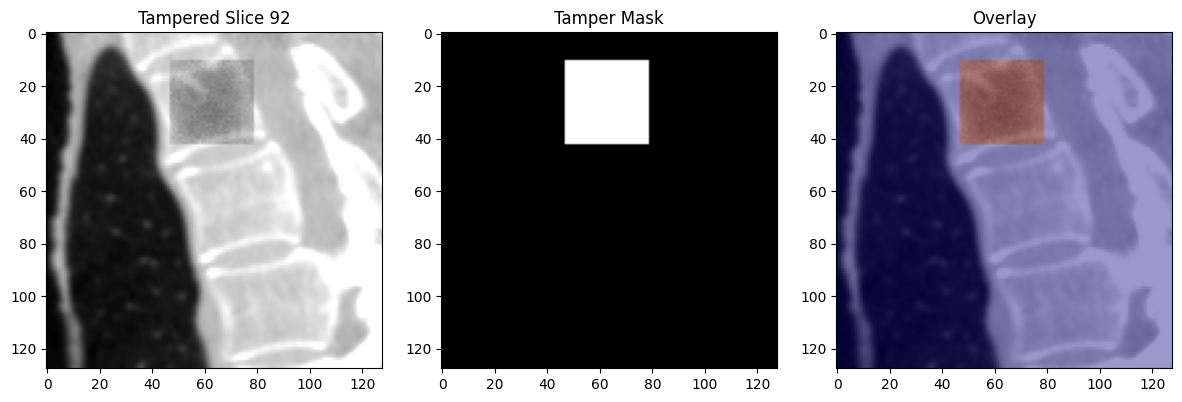

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os


tamper_dir = "/content/output_tampered_MIA"


tampered_files = [f for f in os.listdir(tamper_dir) if f.endswith("_tampered.npy")]
sample_file = random.choice(tampered_files)

tampered_path = os.path.join(tamper_dir, sample_file)
mask_path = tampered_path.replace("_tampered.npy", "_tamper_mask.npy")

tampered_vol = np.load(tampered_path)
mask_vol = np.load(mask_path)

print("Tampered volume shape:", tampered_vol.shape)
print("Mask volume shape:", mask_vol.shape)

tamper_indices = np.where(mask_vol > 0)
slice_idx = tamper_indices[2][0] if len(tamper_indices[2]) > 0 else tampered_vol.shape[2] // 2


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(tampered_vol[:, :, slice_idx], cmap="gray")
plt.title(f"Tampered Slice {slice_idx}")

plt.subplot(1, 3, 2)
plt.imshow(mask_vol[:, :, slice_idx], cmap="gray")
plt.title("Tamper Mask")

plt.subplot(1, 3, 3)
plt.imshow(tampered_vol[:, :, slice_idx], cmap="gray")
plt.imshow(mask_vol[:, :, slice_idx], cmap="jet", alpha=0.4)
plt.title("Overlay")

plt.tight_layout()
plt.show()


In [ ]:
import os
from glob import glob

real_root = "/content/CT_dataset"
fake_roots = [
    "/content/output_tampered_AAH",
    "/content/output_tampered_AIS",
    "/content/output_tampered_MIA"
]

real_files = []
for subtype in ["AAH", "AIS", "MIA"]:
    real_files += glob(os.path.join(real_root, subtype, "*.npy"))

fake_files = []
for froot in fake_roots:
    fake_files += glob(os.path.join(froot, "*.npy"))

print(f"Real: {len(real_files)}   Fake: {len(fake_files)}")


Real: 1050   Fake: 3636


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

real_root = "/content/drive/MyDrive/CT_dataset"
fake_roots = [
    "/content/drive/MyDrive/output_tampered_AAH",
    "/content/drive/MyDrive/output_tampered_AIS",
    "/content/drive/MyDrive/output_tampered_MIA"
]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import torch
import torch.nn.functional as F

def preprocess_volume(vol, hu_min=-1000, hu_max=400, target_shape=(96,96,96)):
    """
    Preprocesses a 3D CT volume:
    1. Clip HU window
    2. Normalize to [0,1]
    3. Resize to target shape
    """

    vol = np.clip(vol, hu_min, hu_max)


    vol = (vol - hu_min) / (hu_max - hu_min)
    vol = vol.astype(np.float32)


    vol_t = torch.tensor(vol).unsqueeze(0).unsqueeze(0)
    vol_t = F.interpolate(vol_t, size=target_shape, mode="trilinear", align_corners=False)

    vol = vol_t.squeeze().numpy()
    return vol


In [ ]:
import torchio as tio

augment = tio.Compose([
    tio.RandomFlip(axes=(0,1,2)),
    tio.RandomAffine(scales=(0.9,1.1), degrees=10),
    tio.RandomNoise(std=0.01),
])

class CTDataset(torch.utils.data.Dataset):
    def __init__(self, file_paths, label):
        self.file_paths = file_paths
        self.label = label

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        path = self.file_paths[idx]
        vol = np.load(path)
        vol = preprocess_volume(vol)
        vol = np.expand_dims(vol, 0)
        vol = torch.tensor(vol, dtype=torch.float32)
        label = torch.tensor(self.label, dtype=torch.float32)

        if self.label == 1:
             vol = augment(vol)

        return vol, label

In [ ]:
!pip install torchio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.9/193.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 19.9 MB/s eta 0:00:00


In [ ]:
import torchio as tio

augment = tio.Compose([
    tio.RandomFlip(axes=(0,1,2)),
    tio.RandomAffine(scales=(0.9,1.1), degrees=10),
    tio.RandomNoise(std=0.01),
])

def __getitem__(self, idx):
    path = self.file_paths[idx]
    vol = np.load(path)
    vol = preprocess_volume(vol)
    vol = np.expand_dims(vol, 0)
    vol = torch.tensor(vol, dtype=torch.float32)
    label = torch.tensor(self.label, dtype=torch.float32)

    if self.label is not None:
        vol = augment(vol)
    return vol, label


In [ ]:
import numpy as np
v = np.load("/content/CT_dataset/AAH/sample206_AAH.npy")
v_p = preprocess_volume(v)
print(v_p.shape, v_p.min(), v_p.max())


(96, 96, 96) 0.0 1.0


In [ ]:
"""import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, ConcatDataset, random_split
from monai.networks.nets import EfficientNetBN, resnet
from glob import glob
import torch.nn.functional as F
from tqdm import tqdm
import torchio as tio


def preprocess_volume(vol, hu_min=-1000, hu_max=400, target_shape=(96,96,96)):
    # Convert to float32 before clipping to handle negative values
    vol = vol.astype(np.float32)
    vol = np.clip(vol, hu_min, hu_max)
    vol = (vol - hu_min) / (hu_max - hu_min)
    vol = vol.astype(np.float32)
    vol_t = torch.tensor(vol).unsqueeze(0).unsqueeze(0)
    vol_t = F.interpolate(vol_t, size=target_shape, mode="trilinear", align_corners=False)
    return vol_t.squeeze().numpy()

class CTDataset(torch.utils.data.Dataset):
    def __init__(self, file_paths, label):
        self.file_paths = file_paths
        self.label = label

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        path = self.file_paths[idx]
        vol = np.load(path)
        vol = preprocess_volume(vol)
        vol = np.expand_dims(vol, 0)
        vol = torch.tensor(vol, dtype=torch.float32)
        label = torch.tensor(self.label, dtype=torch.float32)
        return vol, label

real_root = "/content/CT_dataset"
fake_roots = [
    "/content/output_tampered_AAH",
    "/content/output_tampered_AIS",
    "/content/output_tampered_MIA"
]

real_files = []
for subtype in ["AAH", "AIS", "MIA"]:
    real_files += glob(os.path.join(real_root, subtype, "*.npy"))

fake_files = []
for froot in fake_roots:
    fake_files += glob(os.path.join(froot, "*.npy"))

print(f"Real volumes: {len(real_files)} | Fake volumes: {len(fake_files)}")

real_dataset = CTDataset(real_files, 0)
fake_dataset = CTDataset(fake_files, 1)
full_dataset = ConcatDataset([real_dataset, fake_dataset])

train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_ds, val_ds = random_split(full_dataset, [train_size, val_size])
train_loader = DataLoader(train_ds, batch_size=2, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=2)


from torch import amp # Import amp here
class CT_FakeDetector(nn.Module): # Define CT_FakeDetector class here
    def __init__(self):
        super().__init__()
        # Using ResNet50 for 3D
        self.backbone = resnet.resnet50(spatial_dims=3, n_input_channels=1, num_classes=1)

    def forward(self, x):
        return self.backbone(x)

from google.colab import drive # Import drive here
drive.mount('/content/drive')

checkpoint_dir = "/content/drive/MyDrive/ct_scan"
os.makedirs(checkpoint_dir, exist_ok=True)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CT_FakeDetector().to(device) # Instantiate the model
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=5e-5)
scaler = amp.GradScaler('cuda')
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)


latest_checkpoint = None
if len(os.listdir(checkpoint_dir)) > 0:
    latest_checkpoint = max(
        [os.path.join(checkpoint_dir, f) for f in os.listdir(checkpoint_dir) if f.endswith(".pth")],
        key=os.path.getctime,
        default=None
    )

start_epoch, best_val_loss = 0, float("inf")

if latest_checkpoint and os.path.exists(latest_checkpoint):
    try:
        checkpoint = torch.load(latest_checkpoint, map_location=device)
        model.load_state_dict(checkpoint.get("model_state_dict", {}))
        optimizer.load_state_dict(checkpoint.get("optimizer_state_dict", {}))
        scaler.load_state_dict(checkpoint.get("scaler_state_dict", {}))
        start_epoch = checkpoint.get("epoch", 0)
        best_val_loss = checkpoint.get("best_val_loss", float("inf"))
        print(f"Resumed from checkpoint: {latest_checkpoint}")
    except Exception as e:
        print(f"Failed to load checkpoint: {e}. Starting fresh.")
else:
    print("Starting fresh training...")


epochs = 50
patience, wait = 6, 0
save_every = 200  # mid-epoch checkpoint save frequency


augment = tio.Compose([
    tio.RandomFlip(axes=(0,1,2)),
    tio.RandomAffine(scales=(0.9,1.1), degrees=10),
    tio.RandomNoise(std=0.01),
])

# Modify __getitem__ to apply augmentation to both real and fake data during training
def augmented_getitem(self, idx):
    path = self.file_paths[idx]
    vol = np.load(path)
    vol = preprocess_volume(vol)
    vol = np.expand_dims(vol, 0)
    vol = torch.tensor(vol, dtype=torch.float32)
    label = torch.tensor(self.label, dtype=torch.float32)

    # Apply augmentation to both real and fake data
    vol = augment(vol)

    return vol, label

# Patch the __getitem__ method
CTDataset.__getitem__ = augmented_getitem


for epoch in range(start_epoch, epochs):
    model.train()
    train_loss = 0.0

    for batch_idx, (vols, labels) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")):
        vols, labels = vols.to(device), labels.to(device).unsqueeze(1)
        optimizer.zero_grad()

        with amp.autocast('cuda'):
            preds = model(vols)
            loss = criterion(preds, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        train_loss += loss.item()

        #midepoch save
        if (batch_idx + 1) % save_every == 0:
            checkpoint_path = f"{checkpoint_dir}/model_epoch{epoch+1}_batch{batch_idx+1}.pth"
            torch.save({
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "scaler_state_dict": scaler.state_dict(),
                "best_val_loss": best_val_loss
            }, checkpoint_path)
            print(f"Saved checkpoint: {checkpoint_path}")

   #model valuation
    val_loss, correct, total = 0.0, 0, 0
    model.eval()
    with torch.no_grad(), amp.autocast('cuda'):
        for vols, labels in val_loader:
            vols, labels = vols.to(device), labels.to(device).unsqueeze(1)
            preds = model(vols)
            loss = criterion(preds, labels)
            val_loss += loss.item()
            preds_class = (preds > 0.0).float()
            correct += (preds_class == labels).sum().item()
            total += labels.size(0)


    avg_train_loss = train_loss / len(train_loader)
    avg_val_loss = val_loss / len(val_loader)
    val_acc = correct / total

    print(f"Epoch {epoch+1}: Train Loss={avg_train_loss:.4f}, Val Loss={avg_val_loss:.4f}, Val Acc={val_acc:.4f}")

    scheduler.step(avg_val_loss)

#save model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        wait = 0
        best_path = os.path.join(checkpoint_dir, "CT_FakeDetector_best.pth")
        torch.save(model.state_dict(), best_path)
        print("Validation improved — best model saved!")
    else:
        wait += 1
        print(f" No improvement ({wait}/{patience})")
        if wait >= patience:
            print("Early stopping triggered.")
            break

print("Training complete.")
print(f"Best model saved at: {checkpoint_dir}/CT_FakeDetector_best.pth")"""

'import os\nimport numpy as np\nimport torch\nimport torch.nn as nn\nimport torch.optim as optim\nfrom torch.utils.data import DataLoader, ConcatDataset, random_split\nfrom monai.networks.nets import EfficientNetBN, resnet\nfrom glob import glob\nimport torch.nn.functional as F\nfrom tqdm import tqdm\nimport torchio as tio\n\n\ndef preprocess_volume(vol, hu_min=-1000, hu_max=400, target_shape=(96,96,96)):\n    # Convert to float32 before clipping to handle negative values\n    vol = vol.astype(np.float32)\n    vol = np.clip(vol, hu_min, hu_max)\n    vol = (vol - hu_min) / (hu_max - hu_min)\n    vol = vol.astype(np.float32)\n    vol_t = torch.tensor(vol).unsqueeze(0).unsqueeze(0)\n    vol_t = F.interpolate(vol_t, size=target_shape, mode="trilinear", align_corners=False)\n    return vol_t.squeeze().numpy()\n\nclass CTDataset(torch.utils.data.Dataset):\n    def __init__(self, file_paths, label):\n        self.file_paths = file_paths\n        self.label = label\n\n    def __len__(self):\n 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

save_path = "/content/drive/MyDrive/ct_scan/preprocessing_dataset_loader.py"

code = """import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, ConcatDataset, random_split
from monai.networks.nets import EfficientNetBN
from glob import glob
import torch.nn.functional as F
from tqdm import tqdm


def preprocess_volume(vol, hu_min=-1000, hu_max=400, target_shape=(96,96,96)):
    # Convert to float32 before clipping to handle negative values
    vol = vol.astype(np.float32)
    vol = np.clip(vol, hu_min, hu_max)
    vol = (vol - hu_min) / (hu_max - hu_min)
    vol = vol.astype(np.float32)
    vol_t = torch.tensor(vol).unsqueeze(0).unsqueeze(0)
    vol_t = F.interpolate(vol_t, size=target_shape, mode="trilinear", align_corners=False)
    return vol_t.squeeze().numpy()

class CTDataset(torch.utils.data.Dataset):
    def __init__(self, file_paths, label):
        self.file_paths = file_paths
        self.label = label

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        path = self.file_paths[idx]
        vol = np.load(path)
        vol = preprocess_volume(vol)
        vol = np.expand_dims(vol, 0)
        vol = torch.tensor(vol, dtype=torch.float32)
        label = torch.tensor(self.label, dtype=torch.float32)
        return vol, label

real_root = "/content/CT_dataset"
fake_roots = [
    "/content/output_tampered_AAH",
    "/content/output_tampered_AIS",
    "/content/output_tampered_MIA"
]

real_files = []
for subtype in ["AAH", "AIS", "MIA"]:
    real_files += glob(os.path.join(real_root, subtype, "*.npy"))

fake_files = []
for froot in fake_roots:
    fake_files += glob(os.path.join(froot, "*.npy"))

print(f"Real volumes: {len(real_files)} | Fake volumes: {len(fake_files)}")

real_dataset = CTDataset(real_files, 0)
fake_dataset = CTDataset(fake_files, 1)
full_dataset = ConcatDataset([real_dataset, fake_dataset])

train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_ds, val_ds = random_split(full_dataset, [train_size, val_size])
train_loader = DataLoader(train_ds, batch_size=2, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=2)"""

with open(save_path, "w") as f:
    f.write(code)

print(f"Code saved to: {save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Code saved to: /content/drive/MyDrive/ct_scan/preprocessing_dataset_loader.py


In [ ]:
import torch.nn as nn
from monai.networks.nets import EfficientNetBN, resnet
import torch

class CT_FakeDetector(nn.Module):
    def __init__(self):
        super().__init__()
        # Using ResNet50 for 3D
        self.backbone = resnet.resnet50(spatial_dims=3, n_input_channels=1, num_classes=1)

    def forward(self, x):
        return self.backbone(x)

In [ ]:
!pip install monai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 46.6 MB/s eta 0:00:00


In [ ]:
#break

In [ ]:
from torch import amp
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, ConcatDataset, random_split
from monai.networks.nets import EfficientNetBN
from glob import glob
import torch.nn.functional as F
from tqdm import tqdm
import torch
import torchio as tio
import os
import numpy as np





In [ ]:
def preprocess_volume(vol, hu_min=-1000, hu_max=400, target_shape=(96,96,96)):

    vol = vol.astype(np.float32)
    vol = np.clip(vol, hu_min, hu_max)
    vol = (vol - hu_min) / (hu_max - hu_min)
    vol = vol.astype(np.float32)
    vol_t = torch.tensor(vol).unsqueeze(0).unsqueeze(0)
    vol_t = F.interpolate(vol_t, size=target_shape, mode="trilinear", align_corners=False)
    return vol_t.squeeze().numpy()



In [ ]:
class CTDataset(torch.utils.data.Dataset):
    def __init__(self, file_paths, label):
        self.file_paths = file_paths
        self.label = label

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        path = self.file_paths[idx]
        vol = np.load(path)
        vol = preprocess_volume(vol)
        vol = np.expand_dims(vol, 0)
        vol = torch.tensor(vol, dtype=torch.float32)
        label = torch.tensor(self.label, dtype=torch.float32)
        return vol, label




In [ ]:
class CT_FakeDetector(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = EfficientNetBN("efficientnet-b3", spatial_dims=3, in_channels=1, num_classes=1)
    def forward(self, x):
        return self.net(x)



In [ ]:
from torch import amp
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, ConcatDataset, random_split
from monai.networks.nets import EfficientNetBN
from glob import glob
import torch.nn.functional as funF
from tqdm import tqdm
import torch
import torchio as tio
import os
import numpy as np




from google.colab import drive
drive.mount('/content/drive')

checkpoint_dir = "/content/drive/MyDrive/ct_scan"
os.makedirs(checkpoint_dir, exist_ok=True)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def preprocess_volume(vol, hu_min=-1000, hu_max=400, target_shape=(96,96,96)):

    vol = vol.astype(np.float32)
    vol = np.clip(vol, hu_min, hu_max)
    vol = (vol - hu_min) / (hu_max - hu_min)
    vol = vol.astype(np.float32)
    vol_t = torch.tensor(vol).unsqueeze(0).unsqueeze(0)
    vol_t = funF.interpolate(vol_t, size=target_shape, mode="trilinear", align_corners=False)
    return vol_t.squeeze().numpy()


real_root = "/content/CT_dataset"
fake_roots = [
    "/content/output_tampered_AAH",
    "/content/output_tampered_AIS",
    "/content/output_tampered_MIA"
]

real_files = []
for subtype in ["AAH", "AIS", "MIA"]:
    real_files += glob(os.path.join(real_root, subtype, "*.npy"))

fake_files = []
for froot in fake_roots:
    fake_files += glob(os.path.join(froot, "*.npy"))

print(f"Real volumes: {len(real_files)} | Fake volumes: {len(fake_files)}")

class CTDataset(torch.utils.data.Dataset):
    def __init__(self, file_paths, label):
        self.file_paths = file_paths
        self.label = label

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        path = self.file_paths[idx]
        vol = np.load(path)
        vol = preprocess_volume(vol)
        vol = np.expand_dims(vol, 0)
        vol = torch.tensor(vol, dtype=torch.float32)
        label = torch.tensor(self.label, dtype=torch.float32)
        return vol, label

class CT_FakeDetector(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = EfficientNetBN("efficientnet-b3", spatial_dims=3, in_channels=1, num_classes=1)
    def forward(self, x):
        return self.net(x)




real_dataset = CTDataset(real_files, 0)
fake_dataset = CTDataset(fake_files, 1)
full_dataset = ConcatDataset([real_dataset, fake_dataset])

train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_ds, val_ds = random_split(full_dataset, [train_size, val_size])
train_loader = DataLoader(train_ds, batch_size=2, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=2)



model = CT_FakeDetector().to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=5e-5)
scaler = amp.GradScaler('cuda')
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)


latest_checkpoint = None
if len(os.listdir(checkpoint_dir)) > 0:
    latest_checkpoint = max(
        [os.path.join(checkpoint_dir, f) for f in os.listdir(checkpoint_dir) if f.endswith(".pth")],
        key=os.path.getctime,
        default=None
    )

start_epoch, best_val_loss = 0, float("inf")

if latest_checkpoint and os.path.exists(latest_checkpoint):
    try:
        checkpoint = torch.load(latest_checkpoint, map_location=device)
        model.load_state_dict(checkpoint.get("model_state_dict", {}))
        optimizer.load_state_dict(checkpoint.get("optimizer_state_dict", {}))
        scaler.load_state_dict(checkpoint.get("scaler_state_dict", {}))
        start_epoch = checkpoint.get("epoch", 0)
        best_val_loss = checkpoint.get("best_val_loss", float("inf"))
        print(f"Resumed from checkpoint: {latest_checkpoint}")
    except Exception as e:
        print(f"Failed to load checkpoint: {e}. Starting fresh.")
else:
    print("Starting fresh training...")


epochs = 25
patience, wait = 6, 0
save_every = 200

augment = tio.Compose([
    tio.RandomFlip(axes=(0,1,2), p=0.9),
    tio.RandomAffine(
        scales=(0.7, 1.3),
        degrees=(20, 20, 20),
        translation=(0.15, 0.15, 0.15),
        p=0.9
    ),
    tio.RandomNoise(std=(0.02, 0.08), p=0.9),
    tio.RandomBlur(std=(0, 2.0), p=0.7),
    tio.RandomGamma(p=0.7),
    tio.RandomBiasField(p=0.5),
    tio.RandomMotion(p=0.5)
])


def augmented_getitem(self, idx):
    path = self.file_paths[idx]
    vol = np.load(path)
    vol = preprocess_volume(vol)
    vol = np.expand_dims(vol, 0)
    vol = torch.tensor(vol, dtype=torch.float32)
    label = torch.tensor(self.label, dtype=torch.float32)


    vol = augment(vol)

    return vol, label

CTDataset.__getitem__ = augmented_getitem


for epoch in range(start_epoch, epochs):
    model.train()
    train_loss = 0.0

    for batch_idx, (vols, labels) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")):
        vols, labels = vols.to(device), labels.to(device).unsqueeze(1)
        optimizer.zero_grad()

        with amp.autocast('cuda'):
            preds = model(vols)
            loss = criterion(preds, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        train_loss += loss.item()


        if (batch_idx + 1) % save_every == 0:
            checkpoint_path = f"{checkpoint_dir}/model_epoch{epoch+1}_batch{batch_idx+1}.pth"
            torch.save({
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "scaler_state_dict": scaler.state_dict(),
                "best_val_loss": best_val_loss
            }, checkpoint_path)
            print(f"Saved checkpoint: {checkpoint_path}")


    val_loss, correct, total = 0.0, 0, 0
    model.eval()
    with torch.no_grad(), amp.autocast('cuda'):
        for vols, labels in val_loader:
            vols, labels = vols.to(device), labels.to(device).unsqueeze(1)
            preds = model(vols)
            loss = criterion(preds, labels)
            val_loss += loss.item()
            preds_class = (preds > 0.0).float()
            correct += (preds_class == labels).sum().item()
            total += labels.size(0)

    avg_train_loss = train_loss / len(train_loader)
    avg_val_loss = val_loss / len(val_loader)
    val_acc = correct / total

    print(f"Epoch {epoch+1}: Train Loss={avg_train_loss:.4f}, Val Loss={avg_val_loss:.4f}, Val Acc={val_acc:.4f}")

    scheduler.step(avg_val_loss)


    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        wait = 0
        best_path = os.path.join(checkpoint_dir, "CT_FakeDetector_best.pth")
        torch.save(model.state_dict(), best_path)
        print("Validation improved — best model saved!")
    else:
        wait += 1
        print(f" No improvement ({wait}/{patience})")
        if wait >= patience:
            print("Early stopping triggered.")
            break

print("Training complete.")
print(f"Best model saved at: {checkpoint_dir}/CT_FakeDetector_best.pth")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Real volumes: 1050 | Fake volumes: 3636
Resumed from checkpoint: /content/drive/MyDrive/ct_scan/model_epoch25_batch400.pth


Epoch 25/25:  11%|█         | 200/1874 [03:11<2:06:21,  4.53s/it]

Saved checkpoint: /content/drive/MyDrive/ct_scan/model_epoch25_batch200.pth


Epoch 25/25:  21%|██▏       | 400/1874 [06:17<24:33,  1.00it/s]

Saved checkpoint: /content/drive/MyDrive/ct_scan/model_epoch25_batch400.pth


Epoch 25/25:  32%|███▏      | 600/1874 [09:15<26:21,  1.24s/it]

Saved checkpoint: /content/drive/MyDrive/ct_scan/model_epoch25_batch600.pth


Epoch 25/25:  43%|████▎     | 800/1874 [12:10<22:32,  1.26s/it]

Saved checkpoint: /content/drive/MyDrive/ct_scan/model_epoch25_batch800.pth


Epoch 25/25:  53%|█████▎    | 1000/1874 [15:13<14:52,  1.02s/it]

Saved checkpoint: /content/drive/MyDrive/ct_scan/model_epoch25_batch1000.pth


Epoch 25/25:  64%|██████▍   | 1200/1874 [18:10<11:21,  1.01s/it]

Saved checkpoint: /content/drive/MyDrive/ct_scan/model_epoch25_batch1200.pth


Epoch 25/25:  75%|███████▍  | 1400/1874 [21:00<08:46,  1.11s/it]

Saved checkpoint: /content/drive/MyDrive/ct_scan/model_epoch25_batch1400.pth


Epoch 25/25:  85%|████████▌ | 1600/1874 [23:52<04:34,  1.00s/it]

Saved checkpoint: /content/drive/MyDrive/ct_scan/model_epoch25_batch1600.pth


Epoch 25/25:  96%|█████████▌| 1800/1874 [26:40<01:20,  1.09s/it]

Saved checkpoint: /content/drive/MyDrive/ct_scan/model_epoch25_batch1800.pth


Epoch 25/25: 100%|██████████| 1874/1874 [27:45<00:00,  1.13it/s]


Epoch 25: Train Loss=0.0003, Val Loss=0.2669, Val Acc=0.9701
 No improvement (1/6)
Training complete.
Best model saved at: /content/drive/MyDrive/ct_scan/CT_FakeDetector_best.pth


In [ ]:
best_path = os.path.join(checkpoint_dir, "CT_FakeDetector_best.pth")


In [ ]:
best_model = CT_FakeDetector().to(device)
best_model.load_state_dict(torch.load(best_path, map_location=device))
best_model.eval()


CT_FakeDetector(
  (net): EfficientNetBN(
    (_conv_stem): Conv3d(1, 40, kernel_size=(3, 3, 3), stride=(2, 2, 2), bias=False)
    (_conv_stem_padding): ConstantPad3d(padding=(0, 1, 0, 1, 0, 1), value=0.0)
    (_bn0): BatchNorm3d(40, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    (_blocks): Sequential(
      (0): Sequential(
        (0): MBConvBlock(
          (_expand_conv): Identity()
          (_expand_conv_padding): Identity()
          (_bn0): Identity()
          (_depthwise_conv): Conv3d(40, 40, kernel_size=(3, 3, 3), stride=(1, 1, 1), groups=40, bias=False)
          (_depthwise_conv_padding): ConstantPad3d(padding=(1, 1, 1, 1, 1, 1), value=0.0)
          (_bn1): BatchNorm3d(40, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (_se_adaptpool): AdaptiveAvgPool3d(output_size=1)
          (_se_reduce): Conv3d(40, 10, kernel_size=(1, 1, 1), stride=(1, 1, 1))
          (_se_reduce_padding): Identity()
          (_se_expand): Conv3d(10,

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

best_model.eval()
y_true, y_pred = [], []

with torch.no_grad(), amp.autocast('cuda'):
    for vols, labels in tqdm(val_loader, desc="Evaluating"):
        vols = vols.to(device)
        labels = labels.to(device).unsqueeze(1)
        preds = best_model(vols)
        preds_class = (torch.sigmoid(preds) > 0.5).float()

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds_class.cpu().numpy())

y_true = np.array(y_true).flatten()
y_pred = np.array(y_pred).flatten()

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

print(f"Evaluation Results:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"Confusion Matrix:\n{cm}")


Evaluating: 100%|██████████| 469/469 [05:33<00:00,  1.41it/s]

Evaluation Results:
Accuracy:  0.9904
Precision: 0.9986
Recall:    0.9890
F1-score:  0.9938
Confusion Matrix:
[[209   1]
 [  8 720]]


Evaluating Best Model: 100%|██████████| 469/469 [05:34<00:00,  1.40it/s]


Final Evaluation Results (using Best Model):
Accuracy:  0.9893
Precision: 0.9986
Recall:    0.9876
F1-score:  0.9931
Confusion Matrix:
[[209   1]
 [  9 719]]


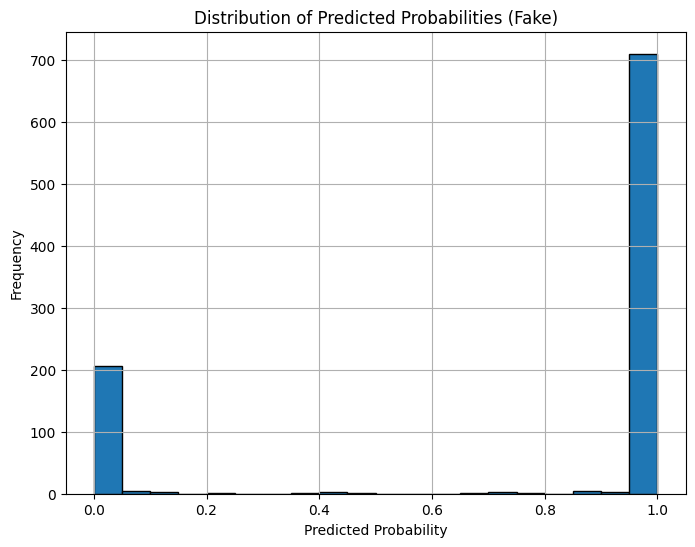

In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch.nn.functional as

if 'best_model' in globals() and 'val_loader' in globals():
    best_model.eval()
    y_true, y_pred_probs = [], []

    device = next(best_model.parameters()).device

    with torch.no_grad():
        for vols, labels in tqdm(val_loader, desc="Evaluating Best Model"):
            vols = vols.to(device)
            labels = labels.to(device)
            preds = best_model(vols)
            probs = torch.sigmoid(preds)

            y_true.extend(labels.cpu().numpy())
            y_pred_probs.extend(probs.cpu().numpy())

    y_true = np.array(y_true).flatten()
    y_pred_probs = np.array(y_pred_probs).flatten()
    y_pred_class = (y_pred_probs > 0.5).astype(int)

    acc = accuracy_score(y_true, y_pred_class)
    prec = precision_score(y_true, y_pred_class)
    rec = recall_score(y_true, y_pred_class)
    f1 = f1_score(y_true, y_pred_class)
    cm = confusion_matrix(y_true, y_pred_class)

    print(f"\nFinal Evaluation Results (using Best Model):")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")


    plt.figure(figsize=(8, 6))
    plt.hist(y_pred_probs, bins=20, edgecolor='black')
    plt.title('Distribution of Predicted Probabilities (Fake)')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

else:
    print("Error: 'best_model' or 'val_loader' not found. Please ensure the cells defining and loading the best model and setting up the validation loader have been run.")


In [ ]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torchvision import transforms


In [ ]:
def generate_gradcam(model, input_image, target_layer, class_idx=None):
    model.eval()
    gradients = []
    activations = []

    def forward_hook(module, input, output):
        activations.append(output)

    def backward_hook(module, grad_in, grad_out):
        gradients.append(grad_out[0])


    handle_forward = target_layer.register_forward_hook(forward_hook)
    handle_backward = target_layer.register_backward_hook(backward_hook)

    output = model(input_image)
    if class_idx is None:
        class_idx = torch.argmax(output)


    model.zero_grad()
    output[0, class_idx].backward()


    grad = gradients[0].detach()
    act = activations[0].detach()

    weights = torch.mean(grad, dim=(2, 3), keepdim=True)
    cam = torch.sum(weights * act, dim=1).squeeze()


    cam = np.maximum(cam.cpu().numpy(), 0)
    cam = cv2.resize(cam, (input_image.shape[2], input_image.shape[3]))
    cam -= np.min(cam)
    cam /= np.max(cam)

    handle_forward.remove()
    handle_backward.remove()

    return cam


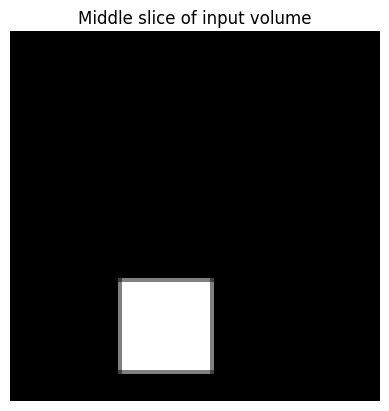

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

image_path = "/content/output_tampered_AAH/sample206_AAH_variant0_tamper_mask.npy"
vol = np.load(image_path)

vol = preprocess_volume(vol)
vol = np.expand_dims(vol, 0)
input_tensor = torch.tensor(vol, dtype=torch.float32).unsqueeze(0).to("cuda" if torch.cuda.is_available() else "cpu")

plt.imshow(vol[0, :, :, vol.shape[3]//2], cmap='gray')
plt.title("Middle slice of input volume")
plt.axis('off')
plt.show()


In [ ]:
!pip install grad-cam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=08871d753c73a427863bdc6c5970d475e68e587659c8ca287e9a7c235e625f6a
  Stored in directory: /root/.cache/pip/wheels/fb/3b/09/2afc520f3d69bc26ae6bd87416759c820a3f7d05c1a077bbf6
Successfully built grad-cam


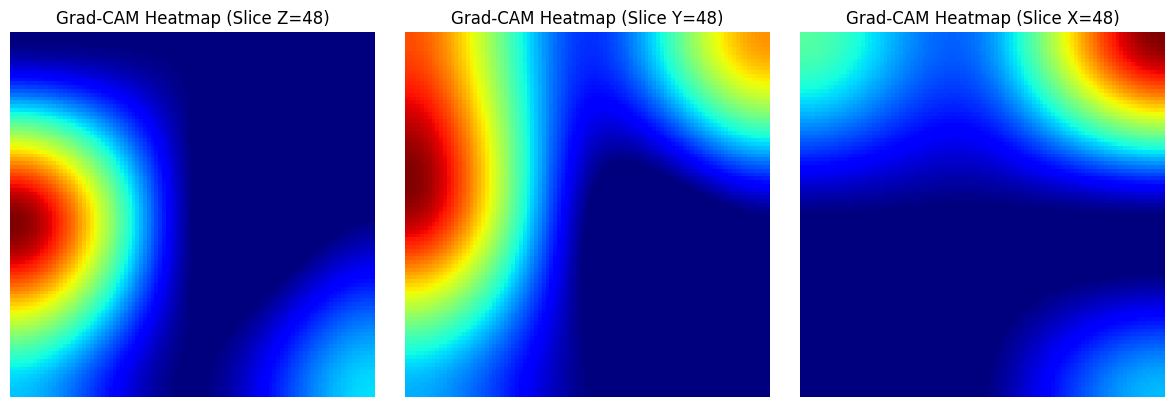

In [ ]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
import torch.nn.functional as F
import torch
cam = GradCAM(model=model, target_layers=[target_layer])
targets = [ClassifierOutputTarget(0)]
image_path = "/content/CT_dataset/AIS/sample1029_AIS.npy"
volume = np.load(image_path)
try:
    preprocessed_volume = preprocess_volume(volume)
    input_tensor = torch.tensor(preprocessed_volume, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
except NameError:
    print("Error: preprocess_volume function not found. Please ensure the cell defining it has been run.")
    input_tensor = None
if input_tensor is not None:
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)


    cam_map = grayscale_cam[0]
    cam_resized = F.interpolate(
        torch.tensor(cam_map).unsqueeze(0).unsqueeze(0),
        size=input_tensor.shape[2:],
        mode="trilinear",
        align_corners=False
    ).squeeze().cpu().numpy()


    mid_z = cam_resized.shape[0] // 2
    mid_y = cam_resized.shape[1] // 2
    mid_x = cam_resized.shape[2] // 2

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(cam_resized[mid_z, :, :], cmap='jet')
    plt.title(f"Grad-CAM Heatmap (Slice Z={mid_z})")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cam_resized[:, mid_y, :], cmap='jet')
    plt.title(f"Grad-CAM Heatmap (Slice Y={mid_y})")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cam_resized[:, :, mid_x], cmap='jet')
    plt.title(f"Grad-CAM Heatmap (Slice X={mid_x})")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np

fake_ct_path = "/content/output_tampered_MIA/sample1003_MIA_variant0_tamper_mask.npy"
real_ct_path = "/content/CT_dataset/MIA/sample1003_MIA.npy"

fake_ct = np.load(fake_ct_path)
real_ct = np.load(real_ct_path)

print(fake_ct.shape, real_ct.shape)


(128, 128, 128) (128, 128, 128)


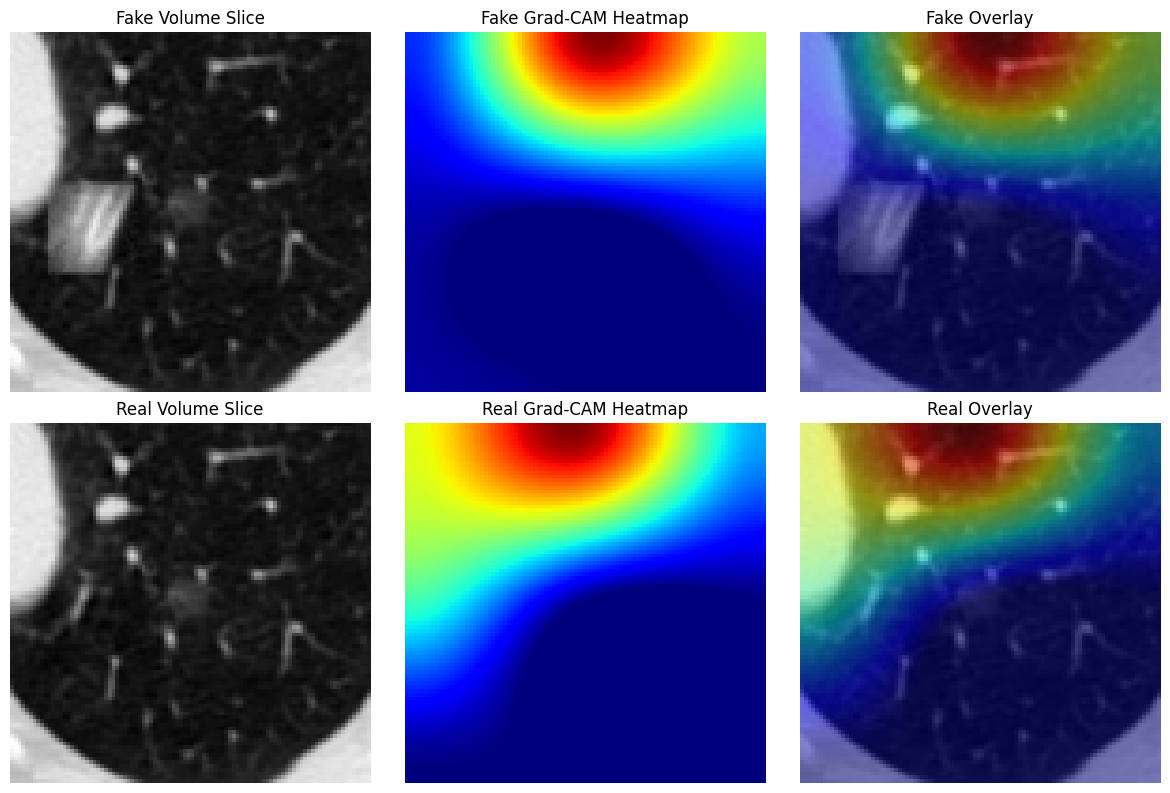

In [ ]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
target_layer = best_model.net._blocks[-1]
cam = GradCAM(model=best_model, target_layers=[target_layer])

fake_ct_path = "/content/output_tampered_MIA/sample1003_MIA_variant0_tampered.npy"
real_ct_path = "/content/CT_dataset/MIA/sample1003_MIA.npy"

try:

    fake_ct_processed = preprocess_volume(np.load(fake_ct_path))
    real_ct_processed = preprocess_volume(np.load(real_ct_path))
    model_device = next(best_model.parameters()).device
    fake_input_tensor = torch.tensor(fake_ct_processed, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(model_device)
    real_input_tensor = torch.tensor(real_ct_processed, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(model_device)

    targets = [ClassifierOutputTarget(0)]


    fake_grayscale_cam = cam(input_tensor=fake_input_tensor, targets=targets)[0]
    real_grayscale_cam = cam(input_tensor=real_input_tensor, targets=targets)[0]

    fake_cam_resized = F.interpolate(
        torch.tensor(fake_grayscale_cam).unsqueeze(0).unsqueeze(0),
        size=fake_input_tensor.shape[2:],
        mode="trilinear",
        align_corners=False
    ).squeeze().cpu().numpy()

    real_cam_resized = F.interpolate(
        torch.tensor(real_grayscale_cam).unsqueeze(0).unsqueeze(0),
        size=real_input_tensor.shape[2:],
        mode="trilinear",
        align_corners=False
    ).squeeze().cpu().numpy()


    mid_z = fake_cam_resized.shape[0] // 2

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.imshow(fake_ct_processed[mid_z, :, :], cmap='gray')
    plt.title("Fake Volume Slice")
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(fake_cam_resized[mid_z, :, :], cmap='jet')
    plt.title("Fake Grad-CAM Heatmap")
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(fake_ct_processed[mid_z, :, :], cmap='gray')
    plt.imshow(fake_cam_resized[mid_z, :, :], cmap='jet', alpha=0.5)
    plt.title("Fake Overlay")
    plt.axis('off')


    plt.subplot(2, 3, 4)
    plt.imshow(real_ct_processed[mid_z, :, :], cmap='gray')
    plt.title("Real Volume Slice")
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(real_cam_resized[mid_z, :, :], cmap='jet')
    plt.title("Real Grad-CAM Heatmap")
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(real_ct_processed[mid_z, :, :], cmap='gray')
    plt.imshow(real_cam_resized[mid_z, :, :], cmap='jet', alpha=0.5)
    plt.title("Real Overlay")
    plt.axis('off')


    plt.tight_layout()
    plt.show()

except NameError:
    print("Error: Ensure best_model and preprocess_volume are defined and have been run.")